# 1.0 Read data from csv file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Defined the column name for each attributes
colNames = ['AppName','Category','Rating','Reviews','Size',
            'Installs','Type','Price','ContentRating','Genres',
            'LastUpdated','CurrentVer','AndroidVer']

# Check on the data and skip for the first row as it is the name of the data.
df = pd.read_csv('playstore.csv', names=colNames, skiprows=1)

# Preview the data
df.head()

,AppName,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# 1.1 Data checking

In [2]:
# Check on the data dimension
df.shape

(10841, 13)

In [3]:
df.info()
df.isnull().sum() #Null Data Sum

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
AppName          10841 non-null object
Category         10841 non-null object
Rating           9367 non-null float64
Reviews          10841 non-null object
Size             10841 non-null object
Installs         10841 non-null object
Type             10840 non-null object
Price            10841 non-null object
ContentRating    10840 non-null object
Genres           10841 non-null object
LastUpdated      10841 non-null object
CurrentVer       10833 non-null object
AndroidVer       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


AppName             0
Category            0
Rating           1474
Reviews             0
Size                0
Installs            0
Type                1
Price               0
ContentRating       1
Genres              0
LastUpdated         0
CurrentVer          8
AndroidVer          3
dtype: int64

# 2.0 Pre-processing (Clean up data)

In [4]:
# Drop the null dataset
df = df[['AppName','Category','Rating','Reviews','Size',
            'Installs','Type','Price','ContentRating','Genres',
            'LastUpdated','CurrentVer','AndroidVer']].dropna(axis=0, how='any')

df.shape

(9360, 13)

In [5]:
df.info()
df.isnull().sum() #Null Data Sum

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
AppName          9360 non-null object
Category         9360 non-null object
Rating           9360 non-null float64
Reviews          9360 non-null object
Size             9360 non-null object
Installs         9360 non-null object
Type             9360 non-null object
Price            9360 non-null object
ContentRating    9360 non-null object
Genres           9360 non-null object
LastUpdated      9360 non-null object
CurrentVer       9360 non-null object
AndroidVer       9360 non-null object
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


AppName          0
Category         0
Rating           0
Reviews          0
Size             0
Installs         0
Type             0
Price            0
ContentRating    0
Genres           0
LastUpdated      0
CurrentVer       0
AndroidVer       0
dtype: int64

# 2.1 Remove outlier from attribute

Will start checking on the unique content of each attribute if any outlier appears

In [6]:
df.Category.value_counts()

FAMILY                 1746
GAME                   1097
TOOLS                   733
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
LIFESTYLE               314
PERSONALIZATION         312
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [7]:
df['Reviews']=df['Reviews'].astype('int')
df.Rating.value_counts()

4.4    1108
4.3    1076
4.5    1037
4.2     951
4.6     823
4.1     707
4.0     567
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      63
2.9      45
2.8      42
2.6      25
2.7      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
2.1       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

In [8]:
df.Reviews.value_counts()

2          83
3          78
4          74
5          74
1          67
7          62
6          62
8          57
12         53
10         46
11         39
9          39
13         37
17         36
19         33
16         31
14         30
21         29
20         28
25         27
15         26
18         25
33         24
22         23
27         23
38         23
28         22
30         22
24         21
23         20
           ..
567632      1
8118609     1
192851      1
8537        1
2537        1
649568      1
35172       1
357         1
9881908     1
125232      1
8433        1
37167       1
245         1
3090680     1
172281      1
2300        1
22782       1
6074627     1
41225       1
157322      1
141584      1
8465        1
139545      1
47386       1
624924      1
33053       1
4383        1
43296       1
156322      1
739329      1
Name: Reviews, Length: 5990, dtype: int64

In [9]:
df.Installs.value_counts()

1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [10]:
df.Type.value_counts()

Free    8715
Paid     645
Name: Type, dtype: int64

In [11]:
df.ContentRating.value_counts()

Everyone           7414
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: ContentRating, dtype: int64

In [12]:
df.Genres.value_counts()

Tools                                  732
Entertainment                          533
Education                              468
Action                                 358
Productivity                           351
Medical                                350
Sports                                 333
Communication                          328
Finance                                323
Photography                            317
Lifestyle                              313
Personalization                        312
Business                               303
Health & Fitness                       297
Social                                 259
Shopping                               238
News & Magazines                       233
Travel & Local                         225
Arcade                                 207
Dating                                 195
Simulation                             194
Casual                                 185
Books & Reference                      178
Video Playe

In [13]:
df.AndroidVer.value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1129
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             337
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              15
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
1.0 and up               2
5.0 - 8.0                2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: AndroidVer, dtype: int64

In [14]:
#removing the commas and + from installs
df['Installs']=df['Installs'].str.replace('+','')
df['Installs']=df['Installs'].str.replace(',','')
#converting object into integer
df['Installs']=df['Installs'].astype(int)

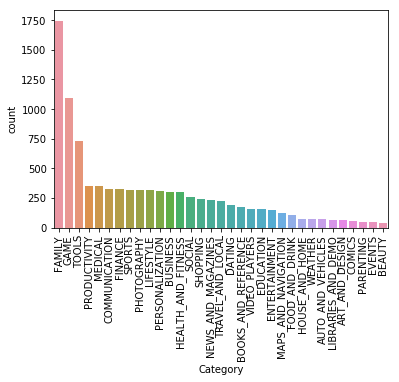

In [15]:
sns.countplot('Category',data=df,order=df['Category'].value_counts().index)
plt.xticks(rotation= 'vertical')
plt.show()

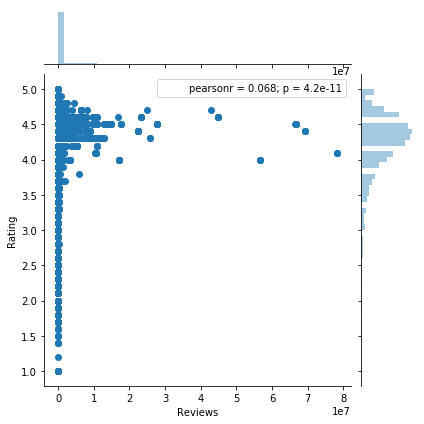

In [16]:
sns.jointplot('Reviews','Rating',data=df)

In [17]:
categoryInstalls=pd.crosstab(index=df['Category'], columns=df['Installs'])
categoryInstalls.head()

Installs,1,5,10,50,100,500,1000,5000,10000,50000,100000,500000,1000000,5000000,10000000,50000000,100000000,500000000,1000000000
Category,,,,,,,,,,,,,,,,,,,
ART_AND_DESIGN,0,0,0,0,1,0,3,3,11,6,18,6,4,3,5,1,0,0,0
AUTO_AND_VEHICLES,0,0,0,0,3,3,8,2,6,5,23,5,13,3,2,0,0,0,0
BEAUTY,0,0,0,0,2,0,1,3,10,4,6,6,8,1,1,0,0,0,0
BOOKS_AND_REFERENCE,0,1,0,1,1,3,25,15,24,11,19,17,20,10,24,0,6,0,1
BUSINESS,0,2,6,3,24,13,39,14,45,12,36,12,46,23,18,7,3,0,0


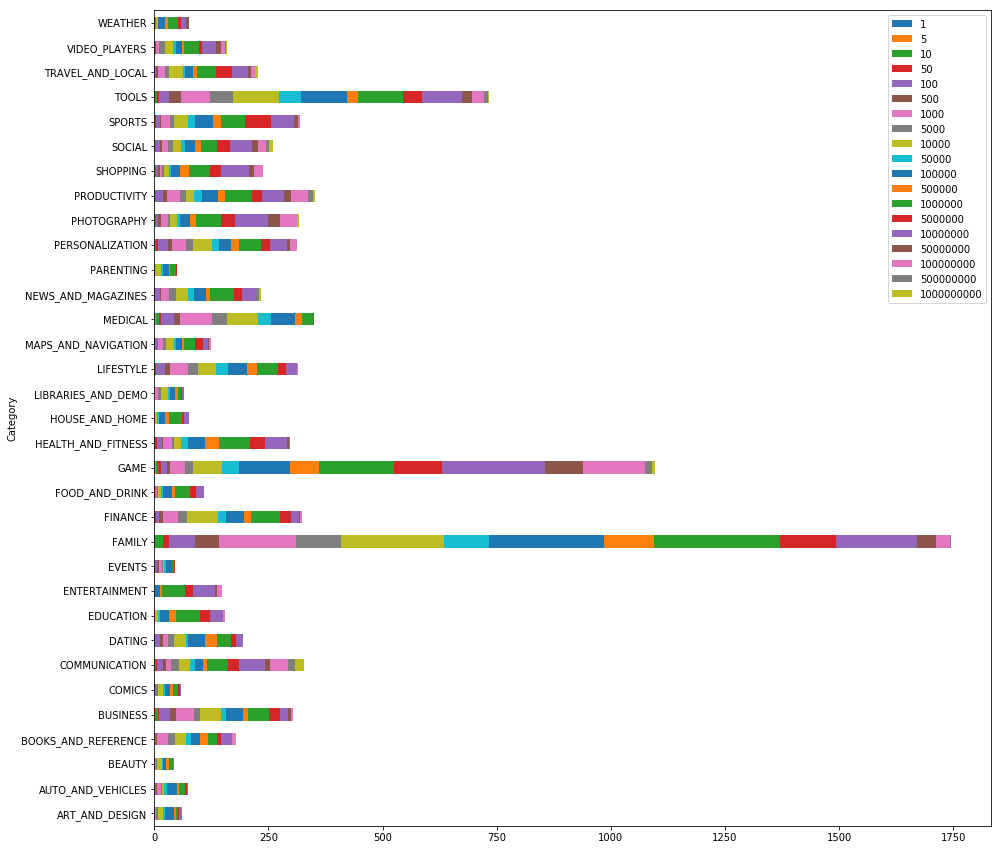

In [18]:
categoryInstalls.plot(kind="barh", figsize=(15,15),stacked=True)
plt.legend(bbox_to_anchor=(1.0,1.0))

In [19]:
df['Price$']=df['Price'].str.replace('$','').astype('float')

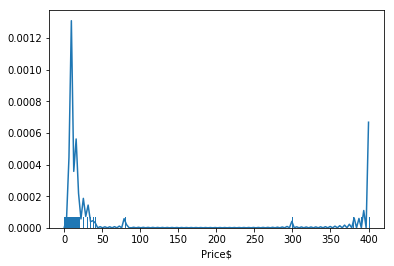

In [20]:
sns.distplot(df['Price$'],kde=True,hist=False,rug=True)

In [21]:
#df['Size'].str.replace('M','') - Cannot do this because then won't be able to bring uniformity to data
df['SizeM']=df[df['Size'].str.contains('M')]['Size'].str.replace('M','').astype(float)*1000 #changing in kilobytes
df['SizeM'].fillna(df['Size'],inplace=True)

In [22]:
df['Sizek']=df['SizeM'].str.replace('k','')
df['Sizek'].fillna(df['SizeM'],inplace=True)
df['SizeK']=df[df['Size'].str.contains('K')]['Size'].str.replace('K','').astype(float)
df['Sizek']=pd.to_numeric(df['Sizek'], errors='coerce') 
#change the size column to numeric and varies with device would change to null values

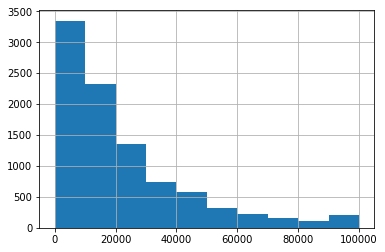

In [23]:
#Assuming that majorly apps in the same category would lie in similar size (mb) range
df['Sizek']=df.groupby('Category')['Sizek'].transform(lambda x: x.fillna(x.mean())) #fill null values with category wise mean 

df['Sizek'].hist()

In [24]:
#renaming 4.4W and up to cleaner version
df['AndroidVer']=df['AndroidVer'].str.replace('4.4W and up','4.4 and up')

In [25]:
#Last Updated Format Changed
df['LastUpdated']=pd.to_datetime(df['LastUpdated'],infer_datetime_format=True)

In [26]:
df.groupby(df['LastUpdated'].dt.year)['AndroidVer'].size()

LastUpdated
2010       1
2011      15
2012      21
2013      93
2014     190
2015     388
2016     651
2017    1497
2018    6504
Name: AndroidVer, dtype: int64

In [27]:
yrtover=pd.crosstab(index=df['LastUpdated'].dt.year, columns=df['AndroidVer'])

In [28]:
pd.set_option('max_columns', 100)

In [29]:
yrtover.head(10)

AndroidVer,1.0 and up,1.5 and up,1.6 and up,2.0 and up,2.0.1 and up,2.1 and up,2.2 and up,2.3 and up,2.3.3 and up,3.0 and up,3.1 and up,3.2 and up,4.0 and up,4.0.3 - 7.1.1,4.0.3 and up,4.1 - 7.1.1,4.1 and up,4.2 and up,4.3 and up,4.4 and up,5.0 - 6.0,5.0 - 8.0,5.0 and up,5.1 and up,6.0 and up,7.0 - 7.1.1,7.0 and up,7.1 and up,8.0 and up,Varies with device
LastUpdated,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2011,0,1,7,1,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2012,0,1,0,1,1,11,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2013,0,2,9,2,3,25,33,5,3,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
2014,1,1,9,6,2,22,41,36,14,10,0,0,18,0,8,0,9,4,1,1,0,0,0,0,0,0,0,0,0,7
2015,0,3,17,3,0,9,44,82,47,49,2,4,52,0,23,0,13,7,5,2,0,0,12,1,0,0,0,0,0,13
2016,0,3,5,8,0,9,30,112,64,32,3,9,120,0,83,0,61,15,12,31,1,0,8,0,2,0,0,0,0,43
2017,0,2,31,1,0,14,35,182,57,61,2,8,248,0,244,1,305,49,32,93,0,1,27,4,11,0,3,1,0,85
2018,1,1,9,5,1,17,20,165,54,55,0,9,691,2,882,0,1671,262,157,754,0,1,488,13,35,1,38,2,5,1165


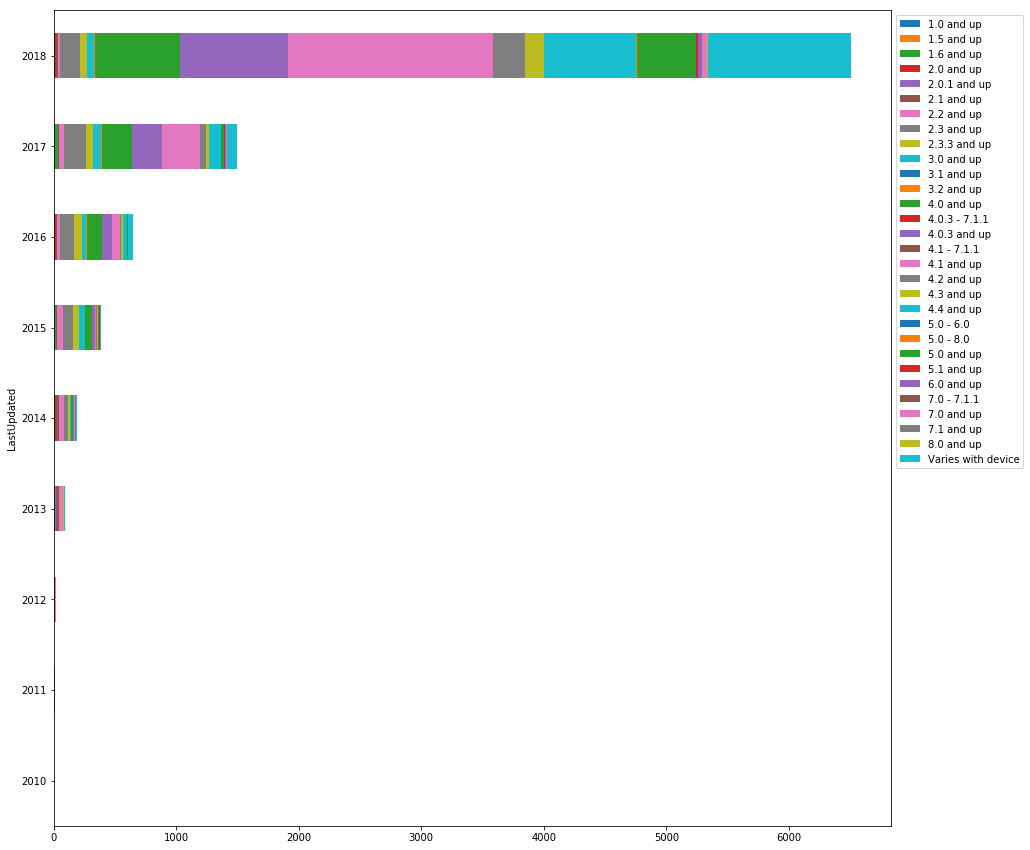

In [30]:
yrtover.plot(kind="barh", figsize=(15,15),stacked=True)
plt.legend(bbox_to_anchor=(1.0,1.0))

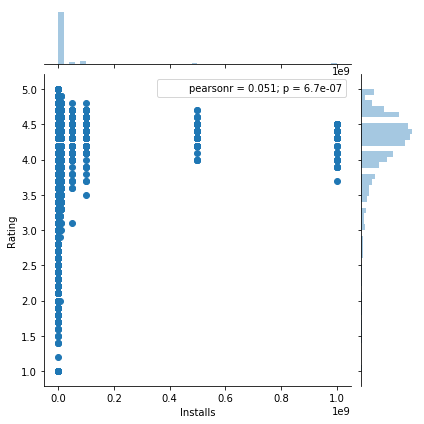

In [31]:
sns.jointplot('Installs','Rating',data=df)

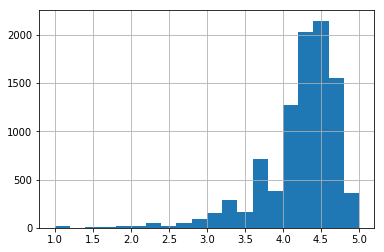

In [32]:
df['Rating'].hist(bins=20)

In [33]:
df.groupby(df['LastUpdated'].dt.year)['AndroidVer'].size()

LastUpdated
2010       1
2011      15
2012      21
2013      93
2014     190
2015     388
2016     651
2017    1497
2018    6504
Name: AndroidVer, dtype: int64

In [34]:
df.info()
df.isnull().sum() #Null Data Sum

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 17 columns):
AppName          9360 non-null object
Category         9360 non-null object
Rating           9360 non-null float64
Reviews          9360 non-null int64
Size             9360 non-null object
Installs         9360 non-null int64
Type             9360 non-null object
Price            9360 non-null object
ContentRating    9360 non-null object
Genres           9360 non-null object
LastUpdated      9360 non-null datetime64[ns]
CurrentVer       9360 non-null object
AndroidVer       9360 non-null object
Price$           9360 non-null float64
SizeM            9360 non-null object
Sizek            9360 non-null float64
SizeK            0 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(2), object(10)
memory usage: 1.6+ MB


AppName             0
Category            0
Rating              0
Reviews             0
Size                0
Installs            0
Type                0
Price               0
ContentRating       0
Genres              0
LastUpdated         0
CurrentVer          0
AndroidVer          0
Price$              0
SizeM               0
Sizek               0
SizeK            9360
dtype: int64

In [35]:
df['Target'] = np.where(df['Installs']>=1000000, 1, 0)
df.head()

,AppName,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer,Price$,SizeM,Sizek,SizeK,Target
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,0.0,19000,19000.0,NaN,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,0.0,14000,14000.0,NaN,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,0.0,8700,8700.0,NaN,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,0.0,25000,25000.0,NaN,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,0.0,2800,2800.0,NaN,0


Text(0,0.5,'PCA2')

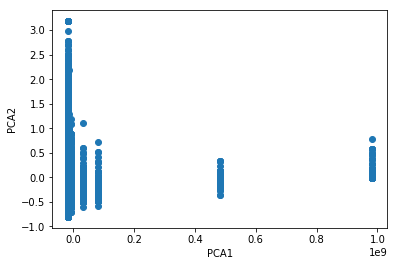

In [36]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

pca = PCA(n_components=2)
cols=['Installs','Rating']
X_pca=pca.fit_transform(df[cols])
X_pca_pd=pd.DataFrame(data=X_pca, columns=['PCA1','PCA2'])
plt.scatter(X_pca_pd.PCA1,X_pca_pd.PCA2)
plt.xlabel('PCA1')
plt.ylabel('PCA2')

Text(0,0.5,'PCA2')

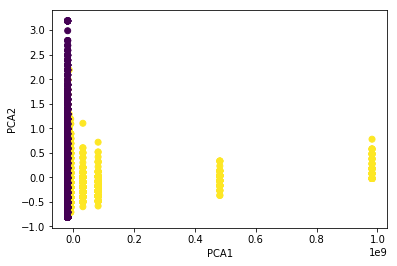

In [37]:
pca = PCA(n_components=2)

new_columns_to_use=['Rating','Reviews','Installs','Price$','Target']
#cols=['Installs','Rating']
X_pca=pca.fit_transform(df[cols])
X_pca_pd=pd.DataFrame(data=X_pca, columns=['PCA1','PCA2'])
plt.scatter(X_pca_pd.PCA1,X_pca_pd.PCA2,c=df.Target)
plt.xlabel('PCA1')
plt.ylabel('PCA2')

Text(0.5,0,'LDA1')

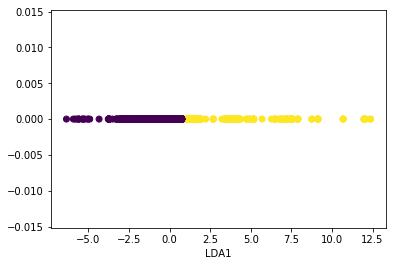

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

new_columns_to_use=['Rating','Reviews','Installs','Price$','Target']

lda=LinearDiscriminantAnalysis(n_components=2)
X_lda=lda.fit_transform(df[new_columns_to_use],df.Target)
y_lda=np.zeros(len(X_lda))
X_lda_pd=pd.DataFrame(data=X_lda,columns=['LDA1'])
plt.scatter(X_lda_pd.LDA1,y_lda,c=df.Target)
plt.xlabel('LDA1')

Use label encoder to convert category date to label

In [39]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

x=df.iloc[:,:-1]
y=df.Target

# select the categorical columns 
cols_index = [1, 6, 8, 9, 12]

for i in cols_index:
    x.iloc[:, i] = labelencoder.fit_transform(x.iloc[:, i])

x.head()

,AppName,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer,Price$,SizeM,Sizek,SizeK
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159,19M,10000,0,0,1,9,2018-01-07,1.0.0,14,0.0,19000,19000.0,NaN
1,Coloring book moana,0,3.9,967,14M,500000,0,0,1,11,2018-01-15,2.0.0,14,0.0,14000,14000.0,NaN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,87510,8.7M,5000000,0,0,1,9,2018-08-01,1.2.4,14,0.0,8700,8700.0,NaN
3,Sketch - Draw & Paint,0,4.5,215644,25M,50000000,0,0,4,9,2018-06-08,Varies with device,17,0.0,25000,25000.0,NaN
4,Pixel Draw - Number Art Coloring Book,0,4.3,967,2.8M,100000,0,0,1,10,2018-06-20,1.1,19,0.0,2800,2800.0,NaN


In [40]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 17 columns):
AppName          9360 non-null object
Category         9360 non-null int64
Rating           9360 non-null float64
Reviews          9360 non-null int64
Size             9360 non-null object
Installs         9360 non-null int64
Type             9360 non-null int64
Price            9360 non-null object
ContentRating    9360 non-null int64
Genres           9360 non-null int64
LastUpdated      9360 non-null datetime64[ns]
CurrentVer       9360 non-null object
AndroidVer       9360 non-null int64
Price$           9360 non-null float64
SizeM            9360 non-null object
Sizek            9360 non-null float64
SizeK            0 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(7), object(5)
memory usage: 1.6+ MB


In [41]:
x.describe()

,Category,Rating,Reviews,Installs,Type,ContentRating,Genres,AndroidVer,Price$,Sizek,SizeK
count,9360.000000,9360.000000,9.360000e+03,9.360000e+03,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000,0.0
mean,16.799466,4.191838,5.143767e+05,1.790875e+07,0.068910,1.488462,62.290491,16.396688,0.961279,22495.626426,NaN
std,8.276260,0.515263,3.145023e+06,9.126637e+07,0.253315,1.022388,32.332336,6.675080,15.821640,21669.031913,NaN
min,0.000000,1.000000,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,8.500000,NaN
25%,11.000000,4.000000,1.867500e+02,1.000000e+04,0.000000,1.000000,37.000000,12.000000,0.000000,6600.000000,NaN
50%,14.000000,4.300000,5.955000e+03,5.000000e+05,0.000000,1.000000,65.000000,16.000000,0.000000,16000.000000,NaN
75%,25.000000,4.500000,8.162750e+04,5.000000e+06,0.000000,1.000000,93.000000,19.000000,0.000000,30000.000000,NaN
max,32.000000,5.000000,7.815831e+07,1.000000e+09,1.000000,5.000000,114.000000,29.000000,400.000000,100000.000000,NaN


In [42]:
# Drop the sizeK column
x = x.drop(['SizeK'], axis=1)

In [43]:
from sklearn.model_selection import train_test_split

cols_index = [1,2,3,6,8,9,13]

X = x.iloc[:,cols_index]
Y = df.Target

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.40, random_state =0)

In [44]:
X.describe()

,Category,Rating,Reviews,Type,ContentRating,Genres,Price$
count,9360.000000,9360.000000,9.360000e+03,9360.000000,9360.000000,9360.000000,9360.000000
mean,16.799466,4.191838,5.143767e+05,0.068910,1.488462,62.290491,0.961279
std,8.276260,0.515263,3.145023e+06,0.253315,1.022388,32.332336,15.821640
min,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,11.000000,4.000000,1.867500e+02,0.000000,1.000000,37.000000,0.000000
50%,14.000000,4.300000,5.955000e+03,0.000000,1.000000,65.000000,0.000000
75%,25.000000,4.500000,8.162750e+04,0.000000,1.000000,93.000000,0.000000
max,32.000000,5.000000,7.815831e+07,1.000000,5.000000,114.000000,400.000000


# KNN

The optimal number of neighbors is 18
The optimal score is 0.94


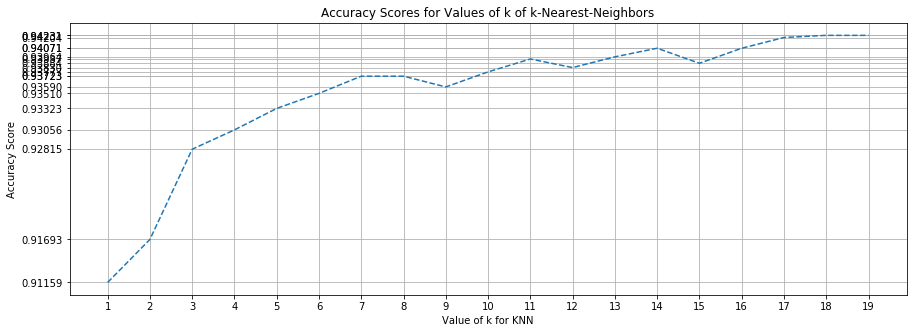

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

scores = []

lrange = list(range(1,20,1))

for k in lrange:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))

optimal_l = lrange[scores.index(max(scores))]
print('The optimal number of neighbors is %d' %optimal_l)
print('The optimal score is %.2f' %max(scores))

plt.figure(2,figsize=(15,5))

plt.plot(lrange, scores, ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.xticks(lrange)
plt.yticks(scores)

plt.grid()
plt.show()

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


The optimal number of neighbors is 18
The optimal score is 0.94


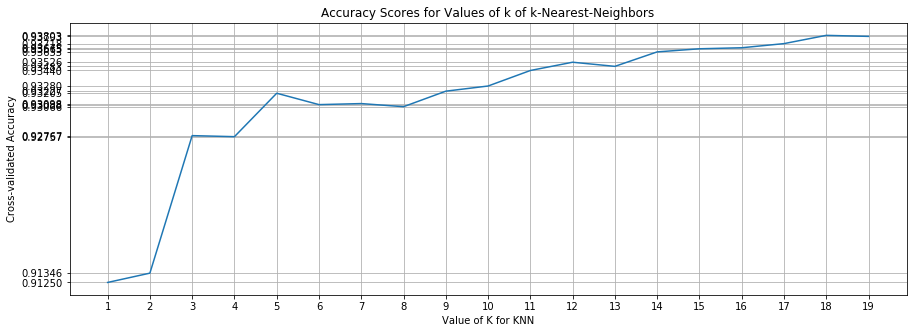

In [46]:
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

krange = list(range(1,20,1))
k_scores = []


for k in krange:
    knn = knn=KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

optimal_k = krange[k_scores.index(max(k_scores))]
print('The optimal number of neighbors is %d' %optimal_k)
print('The optimal score is %.2f' %max(k_scores))


plt.figure(2,figsize=(15,5))
plt.plot(krange, k_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-validated Accuracy")
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.xticks(krange)
plt.yticks(k_scores)

plt.grid()
plt.show()

# Naive Bayers

Number of mislabeled points out of a total 3744 points : 403, performance 89.24%


Text(0.5,24,'Predicted label')

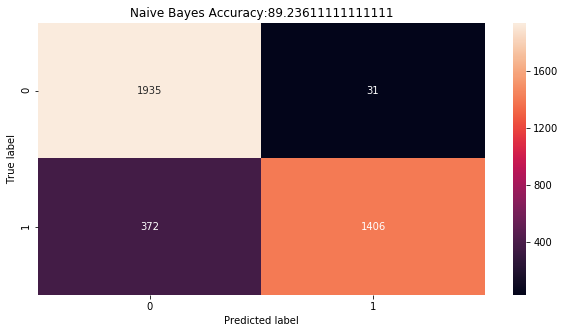

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
%matplotlib inline

# Instantiate the classifier
gnb = GaussianNB()

# Train classifier
gnb.fit(x_train,y_train)

# Test the classifier
predict = gnb.predict(x_test)

# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(x_test.shape[0], (y_test != predict).sum(), 
              gnb.score(x_test,y_test)*100 ))

# Creates a confusion matrix
cm = confusion_matrix(y_test, predict)

# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm)

# plot the confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title("Naive Bayes Accuracy:" + str(gnb.score(x_test,y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Dendogram

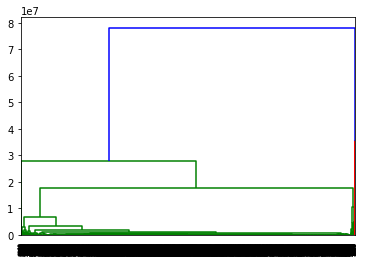

In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(X.iloc[:,[2,6]],'complete')
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=False)
plt.show()

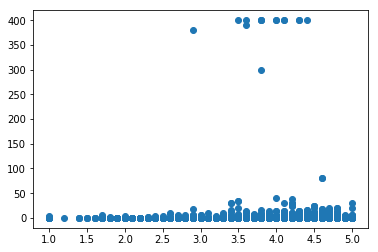

In [49]:
from matplotlib import pyplot as plt
plt.scatter(X.Rating, X['Price$'])

# K-mean

Text(3.86667,391.324,'cluster 2')

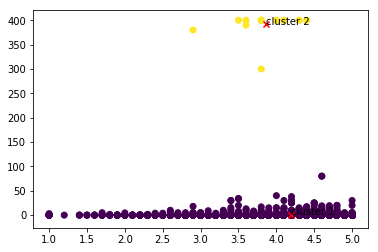

In [50]:
from sklearn.cluster import KMeans

init_centroids = np.array([[0.0,0],[1.5,1.5]])
kmeans = KMeans(n_clusters=2, init=init_centroids, n_init=1)
kmeans.fit(X.iloc[:,[1,6]])

init_centroids = np.array([[0.0,0.0],[1.5,1.5]])
KMeans(algorithm='auto',copy_x=True,
      init=init_centroids,
      max_iter=500, n_clusters=2, n_init=1, n_jobs=1,
      precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

fig,ax=plt.subplots()
plt.scatter(X.iloc[:,1], X.iloc[:,6], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],marker='x',color='red')
ax.annotate('cluster 1', xy=(kmeans.cluster_centers_[0,0],kmeans.cluster_centers_[0,1]))
ax.annotate('cluster 2', xy=(kmeans.cluster_centers_[1,0],kmeans.cluster_centers_[1,1]))

Text(3.86667,391.324,'cluster 2')

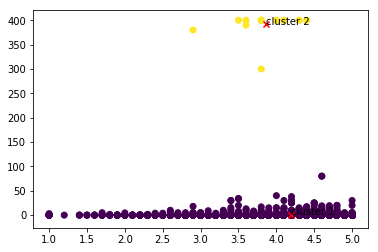

In [51]:
init_centroids = np.array([[0.0,0],[1.5,1.5]])
kmeans = KMeans(n_clusters=2, init=init_centroids, n_init=1)
kmeans.fit(X.iloc[:,[1,6]])

init_centroids = np.array([[0.0,0.0],[1.5,1.5]])
KMeans(algorithm='auto',copy_x=True,
      init=init_centroids,
      max_iter=500, n_clusters=2, n_init=1, n_jobs=1,
      precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

fig,ax=plt.subplots()
plt.scatter(X.iloc[:,1], X.iloc[:,6], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],marker='x',color='red')
ax.annotate('cluster 1', xy=(kmeans.cluster_centers_[0,0],kmeans.cluster_centers_[0,1]))
ax.annotate('cluster 2', xy=(kmeans.cluster_centers_[1,0],kmeans.cluster_centers_[1,1]))

Text(16.2973,4.09276e+07,'cluster 2')

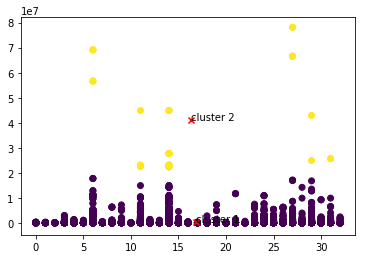

In [52]:
init_centroids = np.array([[0.0,0],[1.5,1.5]])
kmeans = KMeans(n_clusters=2, init=init_centroids, n_init=1)
kmeans.fit(X.iloc[:,[0,2]])

init_centroids = np.array([[0.0,0.0],[1.5,1.5]])
KMeans(algorithm='auto',copy_x=True,
      init=init_centroids,
      max_iter=1000, n_clusters=2, n_init=1, n_jobs=1,
      precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

fig,ax=plt.subplots()
plt.scatter(X.iloc[:,0], X.iloc[:,2], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],marker='x',color='red')
ax.annotate('cluster 1', xy=(kmeans.cluster_centers_[0,0],kmeans.cluster_centers_[0,1]))
ax.annotate('cluster 2', xy=(kmeans.cluster_centers_[1,0],kmeans.cluster_centers_[1,1]))

In [53]:
corr_matrix = x.corr()
corr_matrix['Installs'].sort_values(ascending=True)

Type            -0.053049
Price$          -0.011895
Genres          -0.009717
Category         0.022778
Rating           0.051337
Sizek            0.052779
ContentRating    0.053305
AndroidVer       0.191248
Reviews          0.641605
Installs         1.000000
Name: Installs, dtype: float64

In [54]:
# Select the best feature from the data set
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_  

array([0.05702164, 0.12973072, 0.6647698 , 0.05076913, 0.01962692,
       0.07490011, 0.00318167])

In [55]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape  

(9360, 1)

In [56]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

KBest = SelectKBest(chi2, k=1)
KBest.fit(X,Y)
sup = KBest.get_support(True)
print (sup)

[2]


# Train method

# Linear regression

# Prediction Report

confusion_matrix(wine.target, kmeans.labels_))
classification_report(wine.target, kmeans.labels_))